<a href="https://colab.research.google.com/github/kossou/Cybersecurity3/blob/main/Ransomware_Soulis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#εισαγωγή βιβλιοθηκών - πακέτων
!pip3 install --upgrade pandas
!pip install -U ppscore

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import ppscore as pps

sns.set(rc={'figure.figsize':(35,35)})

  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.
ppscore 1.3.0 requires pandas<2.0.0,>=1.0.0, but you have pandas 2.2.2 which is incompatible.
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of th

In [2]:
#εισαγωγή του συνόλου δεδομένων
dataset=pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')

In [3]:
#eξερεύνηση συνόλου δεδομένων
X = dataset.drop(['Name', 'md5', 'legitimate'], axis=1)
X

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,332,224,258,9,0,361984,115712,0,6135,4096,...,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16
1,332,224,3330,9,0,130560,19968,0,81778,4096,...,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18
2,332,224,3330,9,0,517120,621568,0,350896,4096,...,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18
3,332,224,258,9,0,585728,369152,0,451258,4096,...,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18
4,332,224,258,9,0,294912,247296,0,217381,4096,...,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,11,0,205824,223744,0,123291,4096,...,0,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0
138043,332,224,33167,2,25,37888,185344,0,40000,4096,...,0,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15
138044,332,224,258,10,0,118272,380416,0,59610,4096,...,0,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14
138045,332,224,33166,2,25,49152,16896,0,51216,4096,...,0,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0


In [4]:
#περιγραφικά στατιστικά συνόλου δεδομένων
X.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,23.674263,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,252.093958,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,0.000000,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,0.000000,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,0.000000,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,16596.000000,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000


<Axes: >

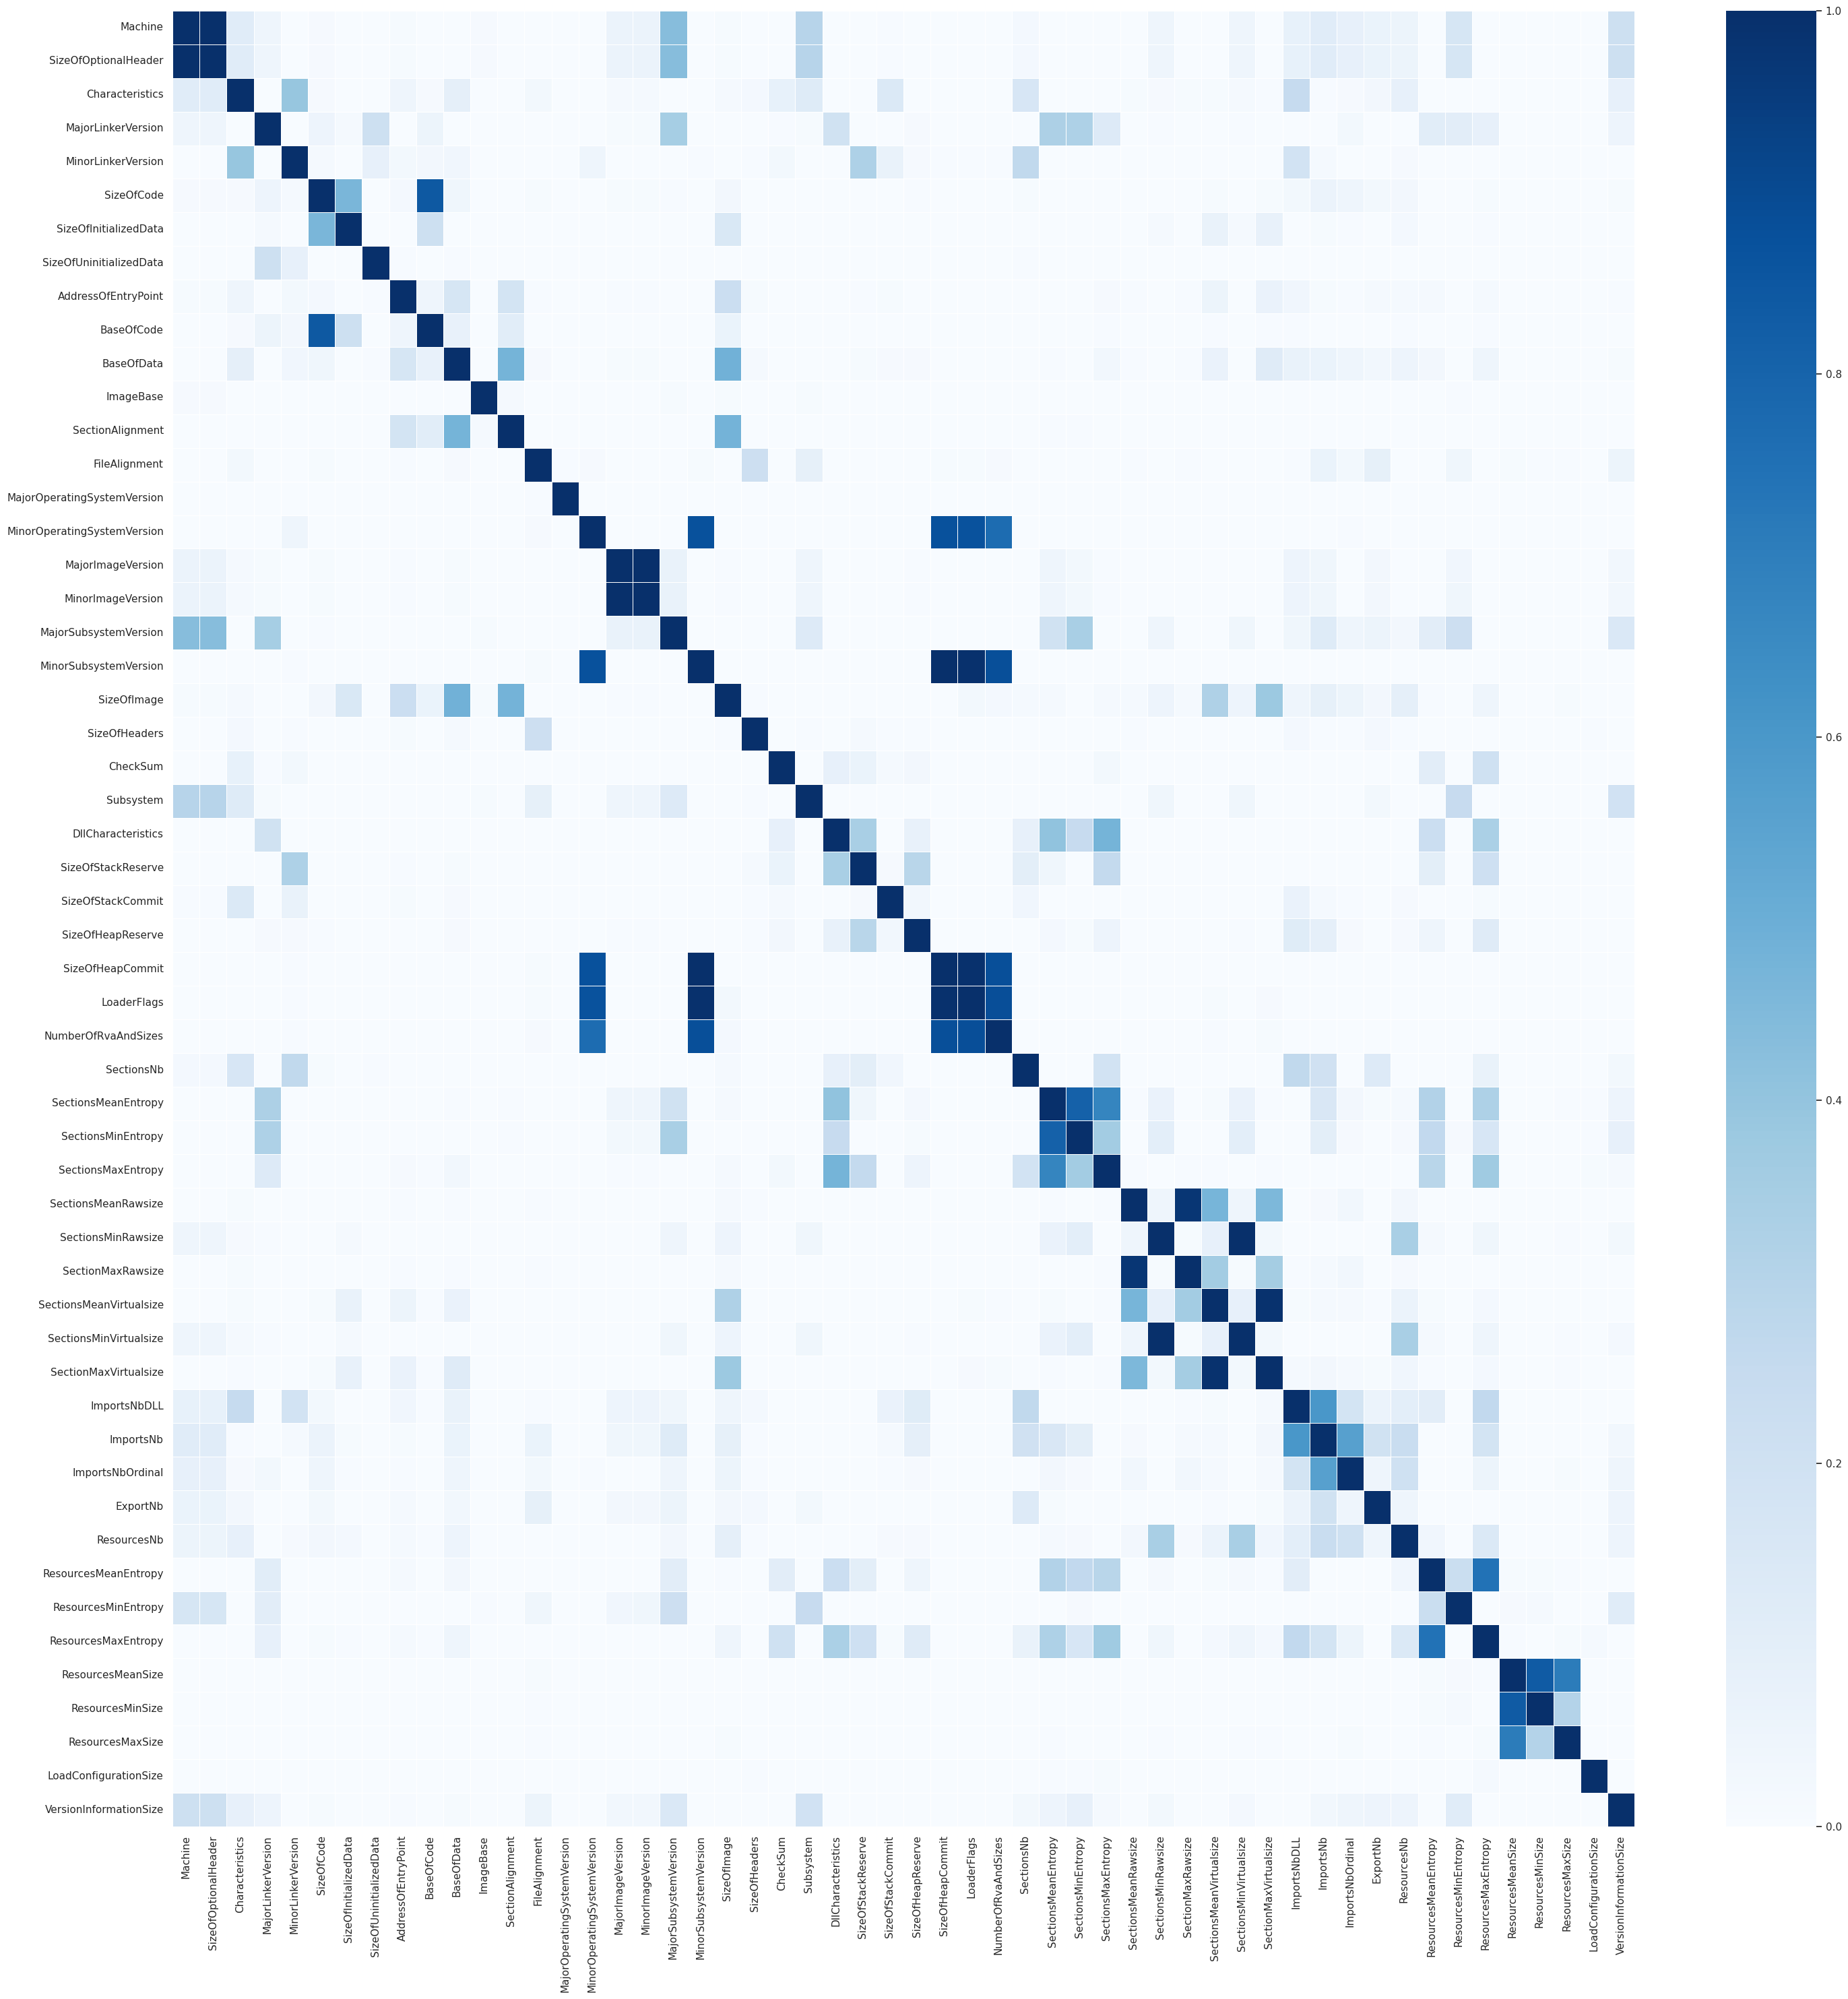

In [5]:
#χρήση συνάρτησης corr διοτι με τη χρήση της συνάρτησης matrix εμφανιζεται το μήνυμα "ValueError: could not convert string to float:" όταν τρέχει η συναρτηση heatmap για όλα τα πεδία


corr=X.corr()

sns.heatmap(corr, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=False)

#mat=pps.matrix(X)

#sns.heatmap(mat, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=False)


